# Data preparation

In [1]:
 # Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
    
%matplotlib inline

In [2]:
# Import ecommercetools modules
from ecommercetools import utilities
from ecommercetools import transactions
from ecommercetools import customers

In [3]:
# Read the datasource to dataframe
df=pd.read_excel("online_retail_II.xlsx")

## Data overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
# Check how many unique customers there are in the DF
df["Customer ID"].nunique()

4383

In [7]:
# Check if and how many transactions are for "returns"
df.Invoice.str.contains("C").sum()

10206

### From the data overview above, it is noted/concluded that
- There are 4383 customers for the 525461 transactions.
- For the data filtering, the following rows are to be excluded:
    - The "returned" orders
    - The null "customer ID"


## Data filtering to drop null "customer ID" and returned transactions

In [8]:
# Exclude the customer ID with "null" (only "customer ID" has null values, so, can directly use pandas dropna with the dataframe)
df=df.copy()

df=df.dropna()

In [16]:
# Drop the "returned" transaction rows
df1=df.copy()
df2 = df1[~df1['Invoice'].str.contains("C",na=False)] # Set "na=false"

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [25]:
df2.head(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom


In [22]:
# Save DF to CSV for "ecommercetools" to use
df2.to_csv('df2.csv')

# Create dataframe with "ecommercetools" library

In [19]:
# Load the sample data of "ecommercetools"
transaction_items=utilities.load_sample_data()

In [23]:
transaction_items.head(1)

,order_id,sku,description,quantity,order_date,unit_price,customer_id,country,line_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [32]:
# Map the data frame to sample data fields
df3=utilities.load_transaction_items('df2.csv',
                                                   date_column='InvoiceDate',
                                                   order_id_column='Invoice',
                                                   customer_id_column='Customer ID',
                                                   sku_column='StockCode',
                                                   quantity_column='Quantity',
                                                   unit_price_column='Price'
                                                  )
df3.head()
                                                   

,Unnamed: 0,order_id,sku,Description,quantity,order_date,unit_price,customer_id,Country,line_price
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [26]:
# Create the customer cohort analysis dataframe
cohorts_df=customers.get_cohorts(df3,period='M')
cohorts_df.head()

,customer_id,order_id,order_date,acquisition_cohort,order_cohort
0,13085.0,489434,2009-12-01 07:45:00,2009-12,2009-12
8,13085.0,489435,2009-12-01 07:46:00,2009-12,2009-12
12,13078.0,489436,2009-12-01 09:06:00,2009-12,2009-12
31,15362.0,489437,2009-12-01 09:08:00,2009-12,2009-12
54,18102.0,489438,2009-12-01 09:24:00,2009-12,2009-12


In [28]:
# Create the customer cohort matrix
cohort_matrix_df=customers.get_cohort_matrix(df3,period='M',percentage=True)
cohort_matrix_df.head()

periods,0,1,2,3,4,5,6,7,8,9,10,11,12
acquisition_cohort,,,,,,,,,,,,,
2009-12,1.0,0.352880,0.334031,0.425131,0.380105,0.359162,0.376963,0.342408,0.336126,0.362304,0.421990,0.495288,0.248168
2010-01,1.0,0.206266,0.310705,0.305483,0.263708,0.300261,0.258486,0.229765,0.279373,0.318538,0.302872,0.099217,NaN
2010-02,1.0,0.236702,0.223404,0.289894,0.244681,0.199468,0.191489,0.284574,0.252660,0.273936,0.071809,NaN,NaN
2010-03,1.0,0.189616,0.230248,0.241535,0.232506,0.203160,0.246050,0.302483,0.275395,0.079007,NaN,NaN,NaN
2010-04,1.0,0.193878,0.193878,0.163265,0.183673,0.224490,0.275510,0.261905,0.068027,NaN,NaN,NaN,NaN


## Visualize the cohort analysis with heatmap

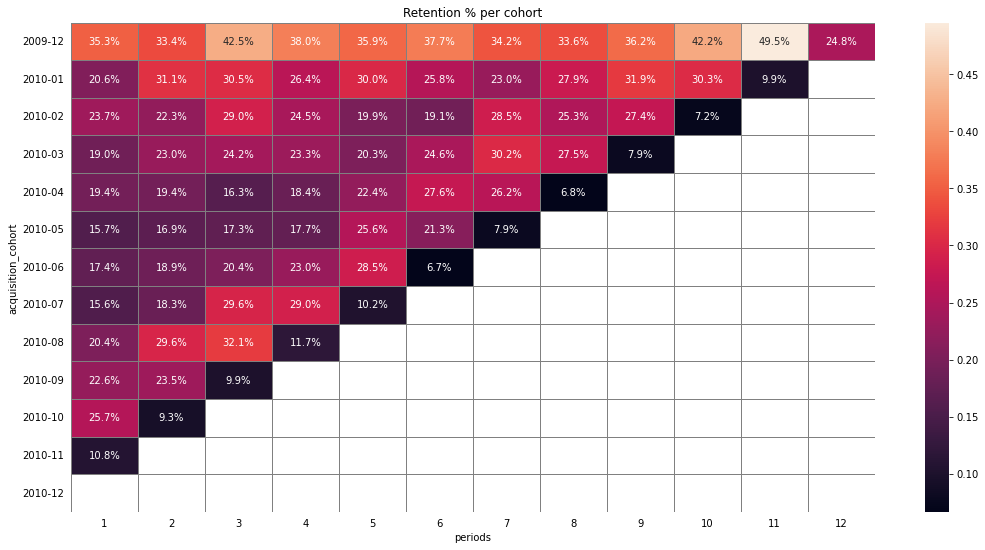

In [30]:
plt.figure(figsize=(18,9))
plt.title('Retention % per cohort')
ax=sns.heatmap(cohort_matrix_df.iloc[:,1:],annot=True,fmt='.1%',linewidths=0.5,linecolor='Grey')
ax.tick_params(left=False,bottom=False)